#### Preparación del Dataframe

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar dataset original de California Housing
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

# Cambiar nombres de columnas
df.columns = [
    'Longitud', 'Latitud', 'EdadCasa', 'TotalHabitaciones',
    'TotalDormitorios', 'Poblacion', 'Hogares',
    'IngresoMedio', 'PrecioMedio'
]

# Crear columnas derivadas
df['HabitacionesPorHogar'] = df['TotalHabitaciones'] / df['Hogares']
df['DormitoriosPorHabitacion'] = df['TotalDormitorios'] / df['TotalHabitaciones']
df['PersonasPorHogar'] = df['Poblacion'] / df['Hogares']

print("Dataset listo.")
print("---------------------------------------------------------------------")
print(df.head())


Dataset listo.
---------------------------------------------------------------------
   Longitud  Latitud  EdadCasa  TotalHabitaciones  TotalDormitorios  \
0   -114.31    34.19      15.0             5612.0            1283.0   
1   -114.47    34.40      19.0             7650.0            1901.0   
2   -114.56    33.69      17.0              720.0             174.0   
3   -114.57    33.64      14.0             1501.0             337.0   
4   -114.57    33.57      20.0             1454.0             326.0   

   Poblacion  Hogares  IngresoMedio  PrecioMedio  HabitacionesPorHogar  \
0     1015.0    472.0        1.4936      66900.0             11.889831   
1     1129.0    463.0        1.8200      80100.0             16.522678   
2      333.0    117.0        1.6509      85700.0              6.153846   
3      515.0    226.0        3.1917      73400.0              6.641593   
4      624.0    262.0        1.9250      65500.0              5.549618   

   DormitoriosPorHabitacion  PersonasPorHog

#### matriz de correlación

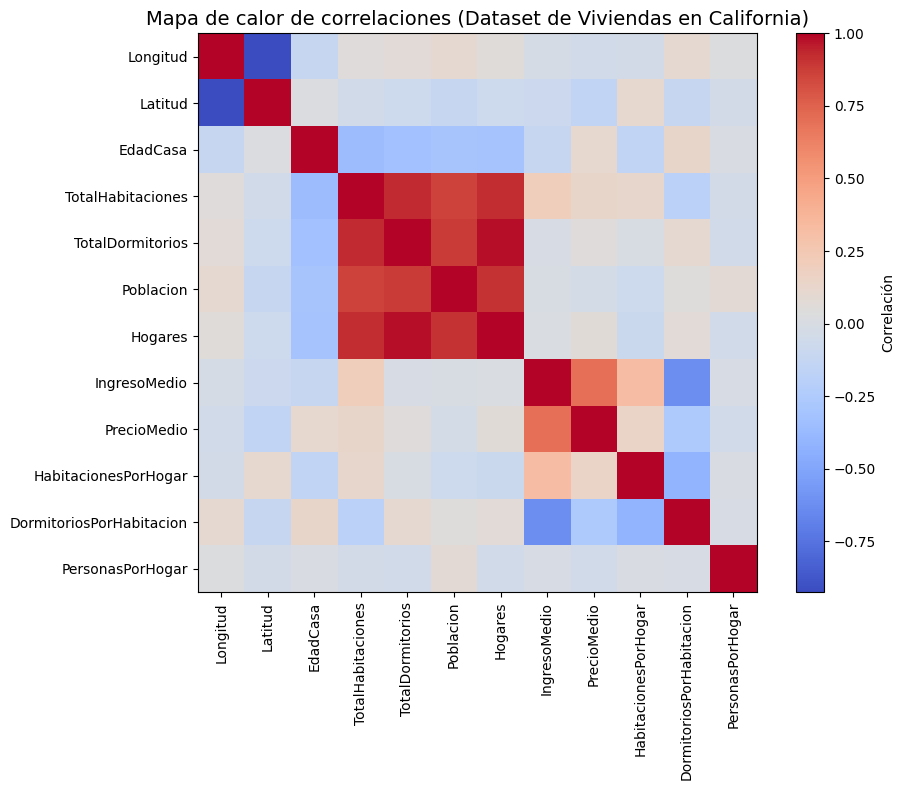

In [31]:
# Calcular matriz de correlación
corr = df.corr()

# Mostrar mapa de calor
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlación')

# Etiquetas de los ejes
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.title('Mapa de calor de correlaciones (Dataset de Viviendas en California)', fontsize=14)
plt.tight_layout()
plt.show()

#### Calcular correlaciones con la variable objetivo (PrecioMedio)

In [32]:
correlaciones = df.corr()['PrecioMedio'].sort_values(ascending=False)

print("Correlaciones con el Precio Medio de las Viviendas:\n")
print(correlaciones)


Correlaciones con el Precio Medio de las Viviendas:

PrecioMedio                 1.000000
IngresoMedio                0.691871
HabitacionesPorHogar        0.150081
TotalHabitaciones           0.130991
EdadCasa                    0.106758
Hogares                     0.061031
TotalDormitorios            0.045783
Poblacion                  -0.027850
PersonasPorHogar           -0.042764
Longitud                   -0.044982
Latitud                    -0.144917
DormitoriosPorHabitacion   -0.258190
Name: PrecioMedio, dtype: float64


#### Gráfico de barras para visualizar las correlaciones con el precio


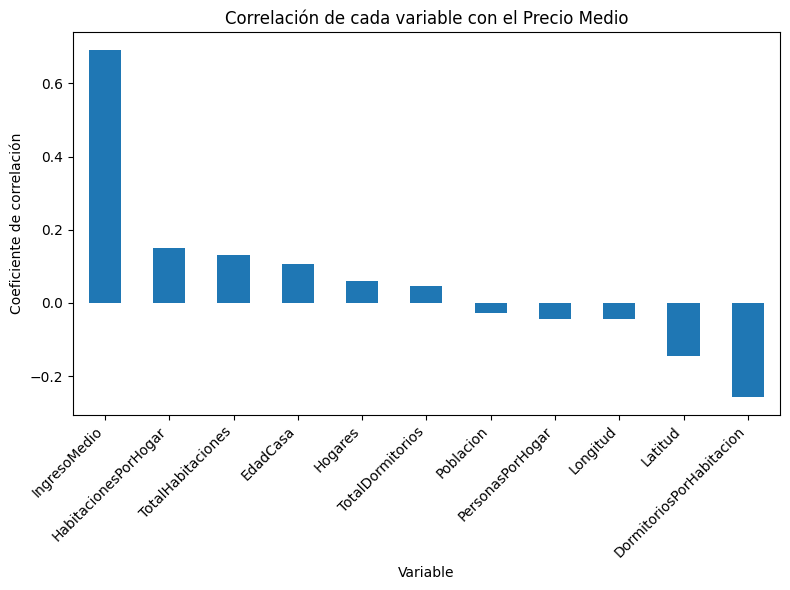

In [33]:
plt.figure(figsize=(8, 6))
correlaciones.drop('PrecioMedio').plot(kind='bar')
plt.title('Correlación de cada variable con el Precio Medio')
plt.ylabel('Coeficiente de correlación')
plt.xlabel('Variable')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


| Variable                                 | Tipo de relación con el precio | Explicación                                                                               |
| ---------------------------------------- | ------------------------------ | ----------------------------------------------------------------------------------------- |
| **IngresoMedio**                         | 🔺 Positiva fuerte             | A mayor ingreso del vecindario, mayor precio medio de las viviendas.                      |
| **HabitacionesPorHogar**                 | 🔺 Positiva moderada           | Más habitaciones por hogar suele indicar casas más grandes y caras.                       |
| **PersonasPorHogar**                     | 🔻 Negativa leve               | Más personas por hogar puede indicar menor nivel socioeconómico o viviendas más pequeñas. |
| **Latitud**                              | 🔻 Negativa                    | Las zonas más al norte de California tienden a tener precios más bajos.                   |
| **EdadCasa**                             | 🔻 Negativa leve               | Casas más viejas suelen valer un poco menos.                                              |
| **TotalDormitorios / TotalHabitaciones** | 🔻 Negativa                    | Una proporción alta de dormitorios puede reflejar viviendas menos espaciosas.             |


#### Preparar los datos para Predicciones



In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Variable objetivo
y = df['PrecioMedio']

# Variables predictoras (puedes ajustar la selección)
X = df[[
    'IngresoMedio', 'EdadCasa', 'HabitacionesPorHogar',
    'DormitoriosPorHabitacion', 'PersonasPorHogar',
    'Latitud', 'Longitud'
]]

# Dividir en conjuntos de entrenamiento (80%) y prueba (20%)
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#### Entrenar el modelo

In [35]:
# Crear el modelo
modelo = LinearRegression()

# Entrenarlo con los datos de entrenamiento
modelo.fit(X_entrenamiento, y_entrenamiento)


LinearRegression()

#### Evaluar el Modelo

In [36]:
# Hacer predicciones sobre el conjunto de prueba
predicciones = modelo.predict(X_prueba)

# Calcular métricas de evaluación
mae = mean_absolute_error(y_prueba, predicciones)
rmse = np.sqrt(mean_squared_error(y_prueba, predicciones))
r2 = r2_score(y_prueba, predicciones)

print("📊 Evaluación del modelo:")
print(f"MAE (Error absoluto medio): {mae:.2f}")
print(f"RMSE (Raíz del error cuadrático medio): {rmse:.2f}")
print(f"R² (Coeficiente de determinación): {r2:.3f}")

📊 Evaluación del modelo:
MAE (Error absoluto medio): 52020.63
RMSE (Raíz del error cuadrático medio): 71222.44
R² (Coeficiente de determinación): 0.632


| Métrica  | Qué significa                                                   | Interpretación                       |
| -------- | --------------------------------------------------------------- | ------------------------------------ |
| **MAE**  | Promedio de cuánto se equivoca el modelo en dólares.            | Cuanto menor, mejor.                 |
| **RMSE** | Parecido al MAE, pero penaliza más los errores grandes.         | También debe ser pequeño.            |
| **R²**   | Qué porcentaje de la variabilidad del precio explica el modelo. | 1.0 = perfecto, 0 = no explica nada. |
Un valor de R² entre 0.6 y 0.8 suele ser muy razonable para este dataset.

#### Ver qué variables pesan más en el precio

In [37]:
# Crear un DataFrame con los coeficientes

importancia = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': modelo.coef_
}).sort_values(by='Coeficiente', ascending=False)

print("📈 Importancia de las variables en la predicción del precio:")
print(importancia)


📈 Importancia de las variables en la predicción del precio:
                   Variable    Coeficiente
3  DormitoriosPorHabitacion  374639.131702
0              IngresoMedio   43623.341545
2      HabitacionesPorHogar    3121.228969
1                  EdadCasa     928.116273
4          PersonasPorHogar    -866.823549
5                   Latitud  -41766.131624
6                  Longitud  -43380.256242


##### Interpretación típica

* IngresoMedio → suele tener el coeficiente más alto → el factor más importante.

* Latitud (negativo) → indica que las casas más al norte valen menos.

* HabitacionesPorHogar → positivo, más habitaciones = casas más caras.

* DormitoriosPorHabitacion → negativo, más dormitorios proporcionales puede reducir el precio medio.